In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install lazypredict
!pip install openpyxl
import lazypredict
from lazypredict.Supervised import LazyClassifier
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, KBinsDiscretizer, MinMaxScaler, PowerTransformer, label_binarize
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif, VarianceThreshold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from IPython.core.display import display, HTML
from lightgbm import LGBMClassifier
np.random.seed(42)

In [2]:
data=pd.read_excel("Urine_data.xlsx") 
X = data.copy()

In [3]:
def missing_data(df):
    # get categorical columns that have numerical values
    categorical = [col for col in df.columns if df[col].dtype != 'object' and len(df[col].unique()) <= 10]

    # get continuous columns
    continuous = [col for col in df.columns if df[col].dtype != 'object' and col not in categorical]

    # impute missing values with median for categorical columns with numerical values
    for col in categorical:
        df[col].fillna(df[col].median(), inplace=True)
    
    # impute missing values with mean for continuous columns
    for col in continuous:
        df[col].fillna(df[col].mean(), inplace=True)
    
    return df


In [4]:
missing_data(data)
data = data.drop("Patient Number", axis=1)
data = data.drop("Target", axis=1)


In [5]:
data.head()

,A/G Ratio,Albumin,Alk,ALT (GPT),AST (GOT),BUN,Calcium,Chloride,Creatinine,Direct Bilirubin,...,Urine Protein,Urobilinogen,age,gender,Hypertension,Diabetes,Smoking,Drinking,FamilyHistory,Disease
0,1.64,3.90,53.00,28.00,25.00,11.00,8.96,107.00,0.60,0.10,...,0.00,0.20,72.00,0.00,0,0,0,0,0,NoDisease
1,1.64,3.20,87.00,14.00,26.00,9.80,8.96,101.80,0.60,0.10,...,1.00,0.10,74.00,0.00,0,0,0,0,0,NoDisease
2,1.64,4.40,69.00,28.00,16.00,21.00,8.50,100.00,1.40,0.20,...,1.00,1.00,69.00,1.00,1,1,0,0,0,NoDisease
3,1.64,4.06,85.18,18.00,24.00,11.00,8.96,103.90,0.96,0.23,...,0.50,0.10,69.00,1.00,0,0,0,1,0,NoDisease
4,1.64,4.10,175.00,34.00,66.00,184.00,7.40,110.00,3.10,0.20,...,0.00,0.20,69.00,1.00,1,1,0,0,0,NoDisease


In [6]:
y = data["Disease"]
x = data.drop(labels = ["Disease"], axis = 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y) 
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

sorted_models = models.drop('ROC AUC', axis=1).sort_values(by='Accuracy', ascending=False)
sorted_models

100%|██████████| 29/29 [00:08<00:00,  3.30it/s]


,Accuracy,Balanced Accuracy,F1 Score,Time Taken
Model,,,,
RandomForestClassifier,0.84,0.69,0.80,0.73
LGBMClassifier,0.84,0.71,0.82,0.84
AdaBoostClassifier,0.81,0.75,0.81,0.44
BaggingClassifier,0.80,0.68,0.79,0.22
DecisionTreeClassifier,0.77,0.70,0.77,0.07
ExtraTreesClassifier,0.74,0.61,0.71,0.57
BernoulliNB,0.68,0.61,0.68,0.06
QuadraticDiscriminantAnalysis,0.67,0.67,0.69,0.05
GaussianNB,0.62,0.64,0.63,0.03


+------------+--------+------------+---------+
|            | Kidney | No disease | Bladder |
+------------+--------+------------+---------+
|   Kidney   |   9    |     0      |    31   |
| No disease |   0    |    107     |    2    |
|  Bladder   |   6    |     3      |   110   |
+------------+--------+------------+---------+
                precision    recall  f1-score   support

        Kidney       0.60      0.23      0.33        40
     NoDisease       0.97      0.98      0.98       109
UrinaryBladder       0.77      0.92      0.84       119

      accuracy                           0.84       268
     macro avg       0.78      0.71      0.71       268
  weighted avg       0.83      0.84      0.82       268



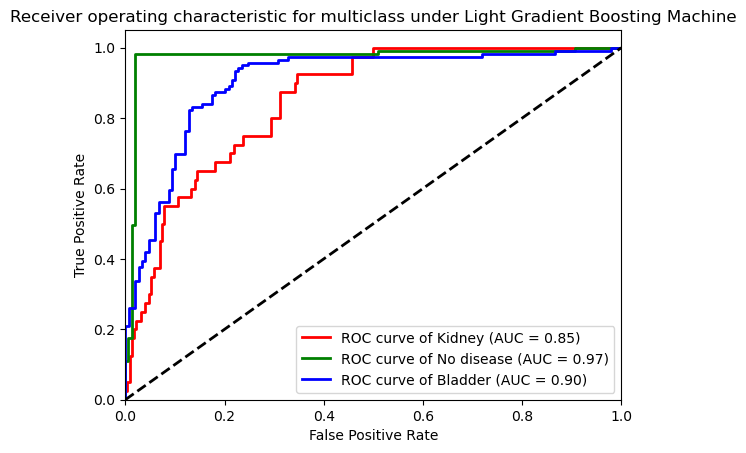

In [8]:
from prettytable import PrettyTable
# define the parameter grid
param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the classifier
lgbm = LGBMClassifier()


# create a GridSearchCV object with the defined parameter grid and LGBMClassifier
grid_search = GridSearchCV(lgbm, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# get the best estimator and evaluate it on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
true_labels = ['Kidney', 'No disease', 'Bladder']
predicted_labels = ['Kidney', 'No disease', 'Bladder']
table = PrettyTable(['', 'Kidney', 'No disease', 'Bladder'])
for i, row in enumerate(cm):
    table.add_row([true_labels[i]] + row.tolist())

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(table)
print(cr)

y_pred_prob = best_clf.predict_proba(x_test)
y_test_b = label_binarize(y_test, classes=['Kidney', 'NoDisease', 'UrinaryBladder'])
n_classes = y_test_b.shape[1]

# calculate the ROC curves and AUC scores for each class
fpr = {}
tpr = {}
roc_auc = {}
class_labels = ['Kidney', 'No disease', 'Bladder']
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot the ROC curves for each class
plt.figure()
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(class_labels[i], roc_auc[i]))

# plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# plot the legend and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass under Light Gradient Boosting Machine')
plt.legend(loc="lower right")
plt.show()


+------------+--------+------------+---------+
|            | Kidney | No disease | Bladder |
+------------+--------+------------+---------+
|   Kidney   |   5    |     2      |    33   |
| No disease |   0    |    105     |    4    |
|  Bladder   |   2    |     7      |   110   |
+------------+--------+------------+---------+
                precision    recall  f1-score   support

        Kidney       0.71      0.12      0.21        40
     NoDisease       0.92      0.96      0.94       109
UrinaryBladder       0.75      0.92      0.83       119

      accuracy                           0.82       268
     macro avg       0.79      0.67      0.66       268
  weighted avg       0.81      0.82      0.78       268



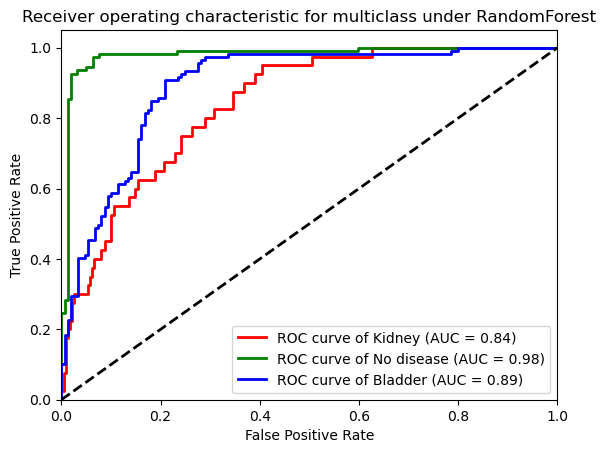

In [9]:

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Define the parameters to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the classifier
clf = RandomForestClassifier()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Train and evaluate the best model
best_clf = grid_search.best_estimator_
best_clf.fit(x_train, y_train)
y_pred = best_clf.predict(x_test)

#metrics and reports
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
true_labels = ['Kidney', 'No disease', 'Bladder']
predicted_labels = ['Kidney', 'No disease', 'Bladder']
table = PrettyTable(['', 'Kidney', 'No disease', 'Bladder'])
for i, row in enumerate(cm):
    table.add_row([true_labels[i]] + row.tolist())

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(table)
print(cr)


###
y_pred_prob = best_clf.predict_proba(x_test)
y_test_b = label_binarize(y_test, classes=['Kidney', 'NoDisease', 'UrinaryBladder'])
n_classes = y_test_b.shape[1]

# calculate the ROC curves and AUC scores for each class
fpr = {}
tpr = {}
roc_auc = {}
class_labels = ['Kidney', 'No disease', 'Bladder']
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot the ROC curves for each class
plt.figure()
colors = ['red', 'green', 'blue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(class_labels[i], roc_auc[i]))

# plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# plot the legend and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass under RandomForest')
plt.legend(loc="lower right")
plt.show()
